id
0       88.0
1       87.0
2       90.0
3       98.0
4      100.0
       ...  
972     98.0
973     98.0
974     84.0
975     89.0
976     97.0
Name: guest_satisfaction_overall, Length: 977, dtype: float64

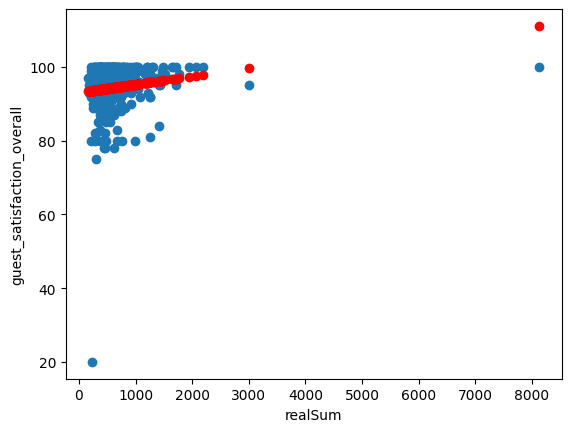

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import sys
import gurobipy as gp

from gurobi_ml import add_predictor_constr

import gurobipy_pandas as gppd

# Base URL for retrieving data
# TODO combine weekdays and weekends, add another column true false, if weekend
historical_data = pd.read_csv(
    "csv_dateien/amsterdam_weekends.csv", index_col=0
)
# "id","realSum","room_type","room_shared","room_private","person_capacity","host_is_superhost","multi","biz","cleanliness_rating","guest_satisfaction_overall","bedrooms","dist","metro_dist","attr_index","attr_index_norm","rest_index","rest_index_norm","lng","lat"

features = "realSum"
target = "guest_satisfaction_overall"

# classify our features between the ones that are fixed and the ones that will be
# part of the optimization problem


x = historical_data[features]
y = historical_data[target]

y



x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=23)

x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

lr = LinearRegression()

lr.fit(x_train, y_train)

c = lr.intercept_
c

m = lr.coef_
m

y_pred_train = m*x_train + c
y_pred_train1 = lr.predict(x_train)

"""
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_pred_train1, color= "red")
plt.xlabel("realSum")
plt.ylabel("guest_satisfaction_overall")

"""

y_pred_test1 = lr.predict(x_test)

plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred_test1, color= "red")
plt.xlabel("realSum")
plt.ylabel("guest_satisfaction_overall")

y

executed


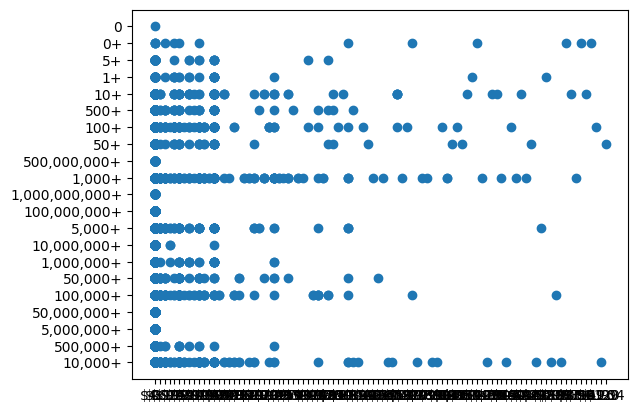

In [56]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

import sys
import gurobipy as gp

from gurobi_ml import add_predictor_constr

import gurobipy_pandas as gppd

# Base URL for retrieving data
# TODO combine weekdays and weekends, add another column true false, if weekend
historical_data = pd.read_csv(
    "csv_dateien/googleplaystore.csv", index_col=0
)


# classify our features between the ones that are fixed and the ones that will be
# part of the optimization problem


x = historical_data["Price"]
y = historical_data["Installs"]

print("executed")
plt.scatter(x, y)

In [3]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
from tensorflow import keras
# import pandas as pd

# load file
train_dataset_url = "csv_dateien/amsterdam_weekends.csv"

column_names = ["id","realSum","room_type","room_shared","room_private","person_capacity","host_is_superhost","multi","biz","cleanliness_rating","guest_satisfaction_overall","bedrooms","dist","metro_dist","attr_index","attr_index_norm","rest_index","rest_index_norm","lng","lat"]
feature_names = column_names[:10]+ column_names[11:]
label_name = "guest_satisfaction_overall"

batch_size = 5

train_dataset = tf.contrib.data.make_csv_dataset(

)

# (x_train, y_train), (x_test, y_test) = data



['id',
 'realSum',
 'room_type',
 'room_shared',
 'room_private',
 'person_capacity',
 'host_is_superhost',
 'multi',
 'biz',
 'cleanliness_rating',
 'bedrooms',
 'dist',
 'metro_dist',
 'attr_index',
 'attr_index_norm',
 'rest_index',
 'rest_index_norm',
 'lng',
 'lat']

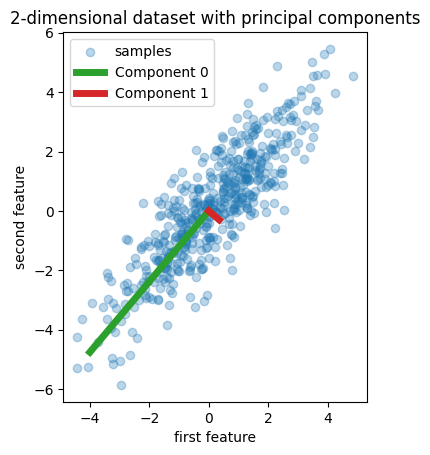

In [1]:
# Beispiel von Skijit Website: https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3], [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)


plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

In [ ]:
# Beispiel von Skijit Website: https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3], [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)


plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

version 13 executed
DATASET
id
0      4.763360
1      5.748310
2      0.384872
3      0.544723
4      1.686798
         ...   
721    3.541861
722    2.523772
723    2.286832
724    2.292722
725    2.123910
Name: dist, Length: 726, dtype: float64
ARRAY
[[ 4.76335974]
 [ 5.74831029]
 [ 0.38487209]
 [ 0.54472256]
 [ 1.68679768]
 [ 3.71913893]
 [ 1.80754865]
 [ 3.14235998]
 [ 1.00992868]
 [ 2.18271446]
 [ 2.93305158]
 [ 1.30549208]
 [ 2.17255598]
 [ 7.30453431]
 [ 1.32780034]
 [ 1.79167567]
 [ 0.43868867]
 [ 1.81416209]
 [ 2.18836232]
 [ 2.49116612]
 [ 4.23063825]
 [ 4.18081713]
 [ 4.12728992]
 [ 2.16161861]
 [ 1.12631132]
 [ 3.363599  ]
 [ 3.85629016]
 [ 2.98858996]
 [ 1.80062729]
 [ 2.85495502]
 [ 6.41163499]
 [ 0.54034618]
 [ 0.51436913]
 [ 3.6950194 ]
 [ 1.09789846]
 [ 4.02506164]
 [ 4.22420187]
 [ 1.4940071 ]
 [ 3.01944478]
 [ 0.36333415]
 [ 5.03650427]
 [ 2.14764422]
 [ 0.37514812]
 [ 0.3604909 ]
 [ 1.39555838]
 [ 1.48338477]
 [ 3.5286813 ]
 [ 1.50590506]
 [10.9070809 ]
 [ 1.2673096

<gurobi.Var dist (value 10.0)>

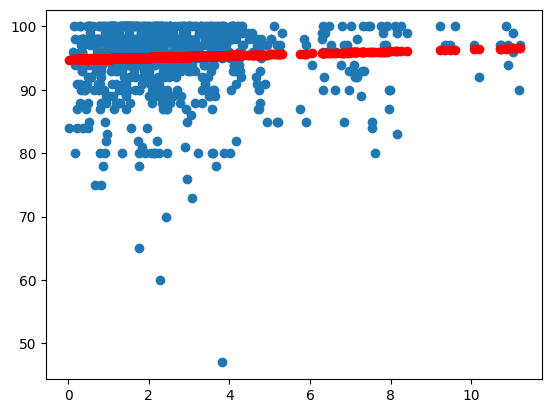

In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

import sys
import gurobipy as gp

from gurobi_ml import add_predictor_constr

import gurobipy_pandas as gppd

# Base URL for retrieving data
# TODO combine weekdays and weekends, add another column true false, if weekend
historical_data = pd.read_csv(
    "csv_dateien/amsterdam_weekends.csv", index_col=0
)


# classify our features between the ones that are fixed and the ones that will be
# part of the optimization problem


features = "dist"
target = "guest_satisfaction_overall"

dataSetOne = historical_data.iloc[:726, :]
dataSetTwo = historical_data.iloc[726:, :]
dataSetTwo = dataSetTwo[features]
dataSetTwo = dataSetTwo.drop(columns=['dist'])


# Run our regression
scaler = StandardScaler()
regression = LinearRegression()
pipe = make_pipeline(scaler, regression)
print("version 13 executed")

x_array= np.array(dataSetOne[features]).reshape(-1, 1)
y_array= np.array(dataSetOne[target]).reshape(-1, 1)

print("DATASET")
print(dataSetOne[features])
print("ARRAY")
print(x_array)

# x_arrayTwo= np.array(dataSetTwo[features]).reshape(-1, 1)
# y_arrayTwo= np.array(dataSetTwo[target]).reshape(-1, 1)

# print(dataSetOne.loc[:, features], dataSetOne.loc[:, target])
pipe.fit(X=x_array,
         y=y_array)

plt.scatter(x_array, y_array)


y_pred_test1 = regression.predict(x_array)


plt.scatter(x_array, y_pred_test1, color= "red")



print("fitted model")
# Start with classical part of the model

#-------------------------------------------------------------

model = gp.Model()

print(x_array)

index = pd.RangeIndex(0, 10)

x = model.addVar(lb=0, ub=10, name="dist")

model.update()
y_approx = model.addVar(ub=100.0, name="guest_satisfaction_overall")
model.update()
model.setObjective(y_approx, gp.GRB.MAXIMIZE)
model.update()

pred_constr = add_predictor_constr(model, pipe, x, y_approx)
pred_constr.print_stats()
model.optimize()

"""

print(x)



"""
x

